In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
from keras.layers import Dense, Convolution2D, UpSampling2D, MaxPooling2D, ZeroPadding2D, Flatten, Dropout, Reshape
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


### Data loading

In [2]:
x = np.load('./facial_data_X.npy')
y = np.load('./facial_labels.npy')

### Sample Data

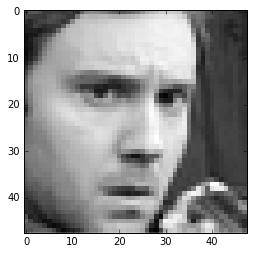

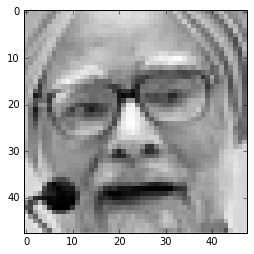

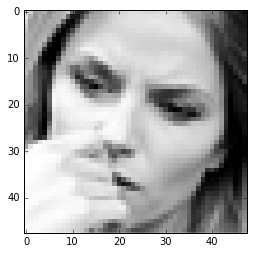

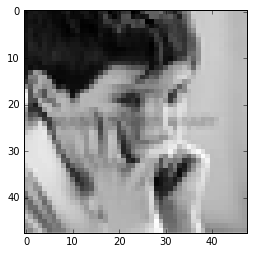

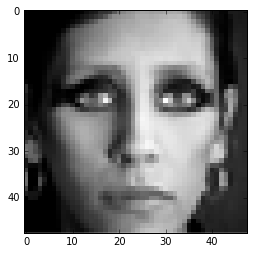

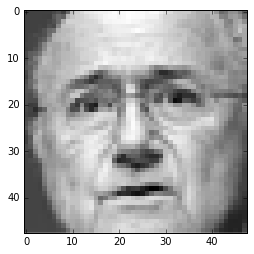

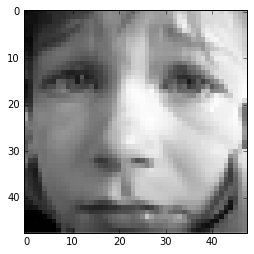

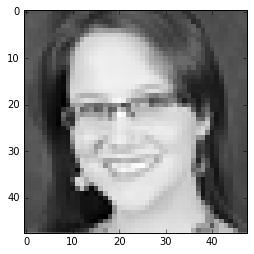

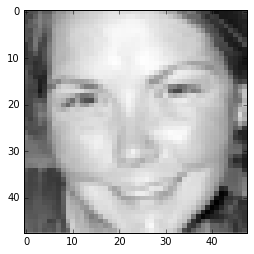

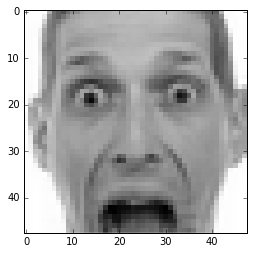

In [3]:
for ix in range(10):
    plt.figure(ix)
    plt.imshow(x[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

### Data normalisation

In [4]:
x -= np.mean(x, axis=0)
x /= np.std(x, axis=0)

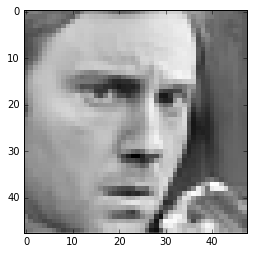

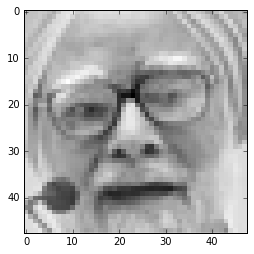

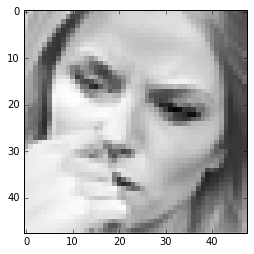

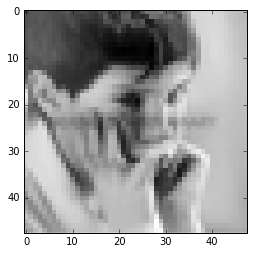

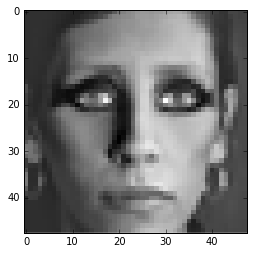

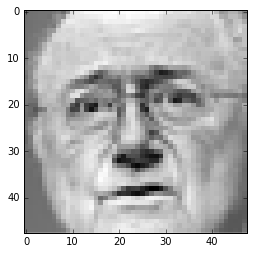

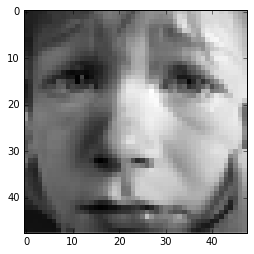

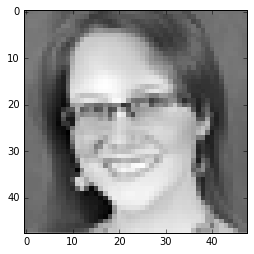

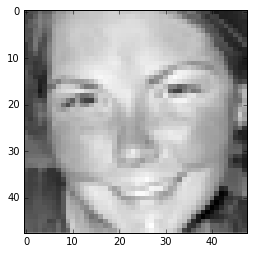

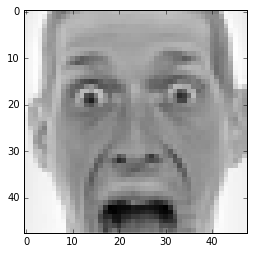

In [5]:
for ix in range(10):
    plt.figure(ix)
    plt.imshow(x[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

### Data splitting

In [6]:
X_train = x[0:28710, :]
Y_train = y[0:28710]
print X_train.shape, Y_train.shape
X_crossval = x[28710:32300, :]
Y_crossval = y[28710:32300]
print X_crossval.shape, Y_crossval.shape

(28710, 2304) (28710,)
(3590, 2304) (3590,)


In [7]:
X_train = X_train.reshape((X_train.shape[0],  48, 48,1))
X_crossval = X_crossval.reshape((X_crossval.shape[0], 48, 48,1))

### Model architecture

In [8]:
model = Sequential()

model.add(Convolution2D(64, 3, 3 , input_shape=( 48, 48,1) ,activation='relu') )
model.add(Convolution2D(64, 3, 3 , activation='relu') )
model.add(Convolution2D(64, 3, 3 , activation='relu') )
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3 , activation='relu') )
model.add(Convolution2D(64, 3, 3 , activation='relu') )
model.add(Convolution2D(64, 3, 3 , activation='relu') )
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(48, 48, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 42, 42, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 19, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 17, 17, 64)        36928     
__________

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()


### One hot vector encoding of output-
Output should be converted to one hot encoded vectors instead of values to get finer results after training.


In [9]:
print y.shape
y_ = np_utils.to_categorical(y, num_classes=10)
print y_.shape

(35887,)
(35887, 10)


In [10]:
Y_train = y_[:28710]
Y_crossval = y_[28710:32300]
print X_crossval.shape, model.input_shape, Y_crossval.shape

(3590, 48, 48, 1) (None, 48, 48, 1) (3590, 10)


### Data Training

In [11]:
"""hist = model.fit(X_train, Y_train,
         nb_epoch=10,
         shuffle=True,
         batch_size=256,
         validation_data=(X_crossval, Y_crossval))
"""

/usr/local/lib/python2.7/dist-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 28710 samples, validate on 3590 samples
Epoch 1/10
28710/28710 [==============================] - 1461s 51ms/step - loss: 1.8495 - acc: 0.2502 - val_loss: 1.6336 - val_acc: 0.3964
Epoch 2/10
28710/28710 [==============================] - 1447s 50ms/step - loss: 1.6085 - acc: 0.3736 - val_loss: 1.4369 - val_acc: 0.4518
Epoch 3/10
28710/28710 [==============================] - 1487s 52ms/step - loss: 1.4654 - acc: 0.4351 - val_loss: 1.3658 - val_acc: 0.4708
Epoch 4/10
28710/28710 [==============================] - 1397s 49ms/step - loss: 1.3742 - acc: 0.4723 - val_loss: 1.2906 - val_acc: 0.5056
Epoch 5/10
28710/28710 [==============================] - 1346s 47ms/step - loss: 1.3107 - acc: 0.4952 - val_loss: 1.2356 - val_acc: 0.5262
Epoch 6/10
28710/28710 [==============================] - 1505s 52ms/step - loss: 1.2687 - acc: 0.5188 - val_loss: 1.2076 - val_acc: 0.5398
Epoch 7/10
28710/28710 [==============================] - 1556s 54ms/step - loss: 1.2309 - acc: 0.5276 - val_lo

### Saving and loading saved model weights

In [12]:
#model.save('/home/pankaj/projects/ML-expression-recognition-master/model weights/model.h5')

In [13]:
model.load_weights('/home/pankaj/projects/ML-expression-recognition-master/model weights/model.h5')

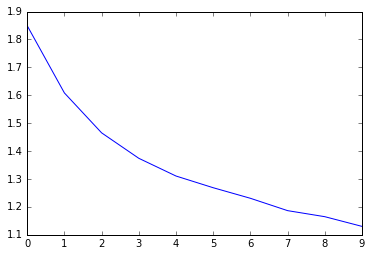

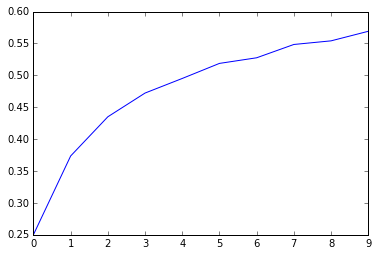

In [14]:
# Plotting training graph
plt.figure(0)
plt.plot(hist.history['loss'])
plt.figure(1)
plt.plot(hist.history['acc'])

plt.show()

In [15]:
print X_train.shape
pred = model.predict(X_train[:10])
print X_train.shape

(28710, 48, 48, 1)
(28710, 48, 48, 1)


4 0
4 0
4 2
6 4
6 6
4 2
4 4
3 3
3 3
5 2


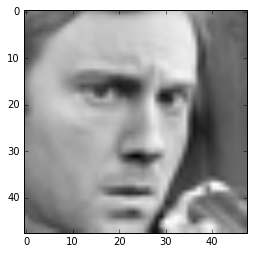

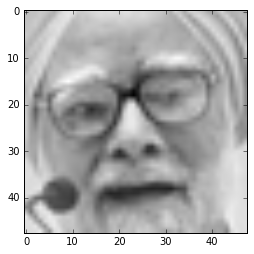

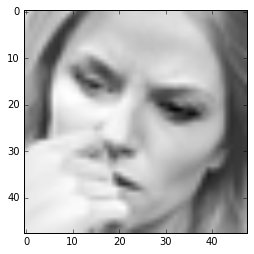

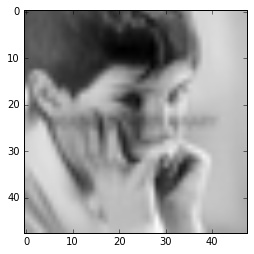

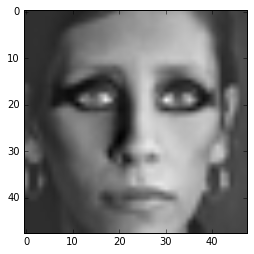

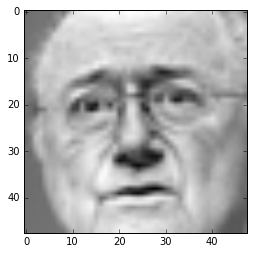

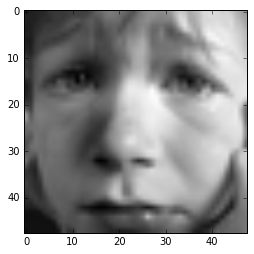

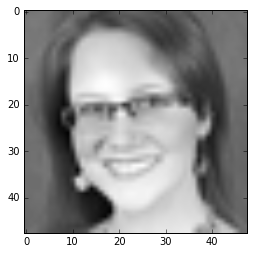

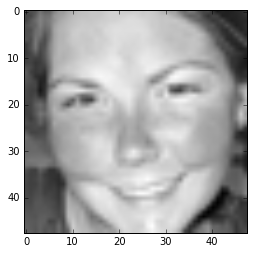

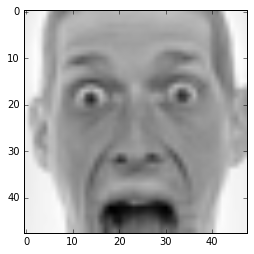

In [18]:
for ix in range(10):
    plt.figure(ix)
    plt.imshow(X_train[ix].reshape(48, 48), cmap='gray')
    print "Example:", ix, " | Predicted:", np.argmax(pred[ix]), " | Original:", np.argmax(y_[ix])
plt.show()